In [3]:
# Import EDA libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Import Local funcs
import sys
sys.path.append('../')
from utils.utils import *

In [14]:
# X_train = pd.read_csv('../data/X_train.csv', index_col=0)
# y_train = pd.read_csv('../data/y_train.csv', index_col=0)
X_train, y_train = get_training()

In [15]:
X_train.head()

,year,fw_start,fw_end,country,c_abrv,v1,v2,v3,v4,v5,...,v278b,v278c_r,v279a,v279b,v279c_r,v279d_r,v280,v281a,v281a_r,v282
id,,,,,,,,,,,,,,,,,,,,,
0,2020,202011,202011,804,UA,2,1,2,2,3,...,45,14.45,15,40,15.40,55,1,uk,475,32
1,2018,201809,201811,688,RS,2,1,2,2,3,...,12,17.12,18,25,18.25,73,2,sr,397,3
2,2017,201706,201803,352,IS,2,2,1,1,2,...,58,15.58,13,20,13.20,-5,2,is,72,87
3,2021,202105,202110,428,LV,1,2,1,1,2,...,42,8.42,8,51,8.51,9,1,lv,256,5157
4,2018,201801,201805,40,AT,1,1,2,2,3,...,51,12.51,13,53,13.53,62,1,de,158,64


In [6]:
y_train.head()


,label
id,
0,2
1,2
2,4
3,3
4,3


## Label Counts

In [7]:
# Get counts per label of the training data
# {'no answer':-1, 'very important':1, 'quite important':2, 'not important':3, 'not at all important':4}
y_train.value_counts()


label
2        14225
3        13476
1        10017
4         9614
0          668
Name: count, dtype: int64

In [8]:
X_train.info()

print("\nObject Types:")
print(X_train.select_dtypes(include='object').columns)
print("\nFloat Types:")
print(X_train.select_dtypes(include='float64').columns)

# X_train.describe() # Not helpful since we have so many columns

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 0 to 47999
Columns: 437 entries, year to v282
dtypes: float64(7), int64(422), object(8)
memory usage: 160.4+ MB

Object Types:
Index(['c_abrv', 'v228b', 'v231b', 'v233b', 'v251b', 'v275b_N2', 'v275b_N1',
       'v281a'],
      dtype='object')

Float Types:
Index(['v228b_r', 'v231b_r', 'v233b_r', 'v251b_r', 'v261_ppp', 'v278c_r',
       'v279c_r'],
      dtype='object')


In [11]:
## Duplicates
print(f"{X_train.duplicated().sum()} duplicated rows")
print("\n")

## Missing Values
missing_values = X_train.columns[X_train.isnull().any()]
print(f"Total: {X_train[missing_values].isnull().sum().sum()} missing values")
print(X_train[missing_values].isnull().sum())

0 duplicated rows


Total: 10 missing values
v228b_r    1
v231b_r    3
v233b_r    2
v251b_r    4
dtype: int64


!! We might have to replace/impute these? - For Logistic, etc

In [17]:
# Feature Correlation
X_train_noObj = X_train.select_dtypes(exclude='object')
correlated_features = set()
correlation_matrix = X_train_noObj.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.99:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [19]:
correlated_features

{'f46_IT',
 'v20b',
 'v243_EISCED',
 'v243_ISCED_1',
 'v243_ISCED_2b',
 'v243_ISCED_3',
 'v243_cs_GB2',
 'v243_edulvlb_1',
 'v243_edulvlb_2',
 'v252_EISCED',
 'v252_ISCED97',
 'v252_ISCED_2b',
 'v252_ISCED_3',
 'v252_cs_GB2',
 'v252_edulvlb_2',
 'v262_8cat',
 'v262_EISCED',
 'v262_ISCED_2b',
 'v262_ISCED_3',
 'v262_edulvlb_2',
 'v263_8cat',
 'v263_EISCED',
 'v263_ISCED_2b',
 'v263_ISCED_3',
 'v263_edulvlb_2',
 'v275c_N1',
 'v278c_r',
 'v279c_r'}

In [24]:
# Check test data
X_test = get_test()

# Check for missing values
missing_values = X_test.columns[X_test.isnull().any()]
print(f"Total: {X_test[missing_values].isnull().sum().sum()} missing values")
print(X_test[missing_values].isnull().sum())

# Check for duplicates
print(f"{X_test.duplicated().sum()} duplicated rows")


Total: 1 missing values
v233b_r    1
dtype: int64
0 duplicated rows


# Visualization

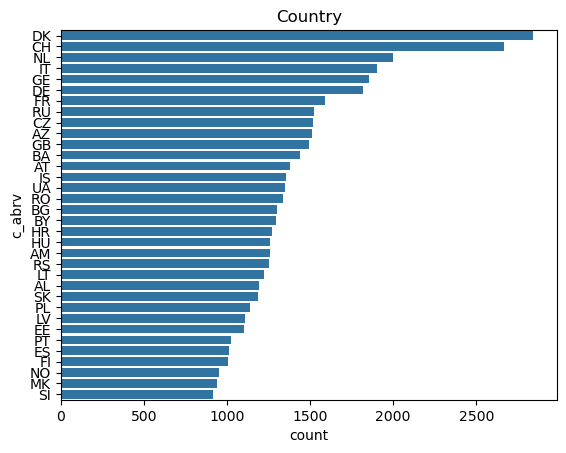

In [20]:
# Plot barplot of c_abrv
sns.countplot(y='c_abrv', data=X_train, order=X_train['c_abrv'].value_counts().index)
plt.title('Country')
plt.show()

<Axes: >

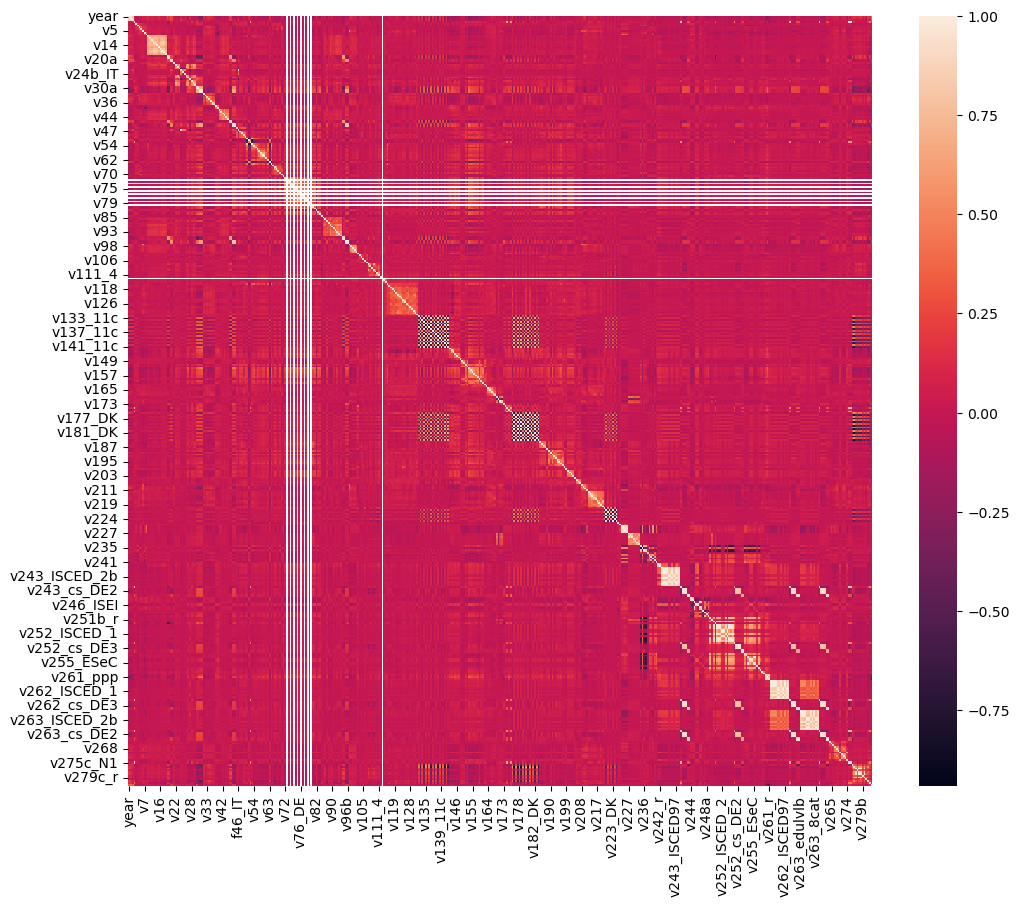

In [25]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix)